<a href="https://colab.research.google.com/github/Gilmaralexandre/Transfer_Learning/blob/main/Classifica%C3%A7%C3%A3o_de_Objetos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Objetos, neste exemplo de tutoriais do tensorflow, o objetivo é criar uma rede que consegue identificar qual objeto está na imagem.

- A base de dados em questão é a fashion mnist, que possui diversar imagens


In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Objetos presentes na base de dados

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Dimensões 
train_images.shape

(60000, 28, 28)

In [ ]:
# identidicados por labels

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

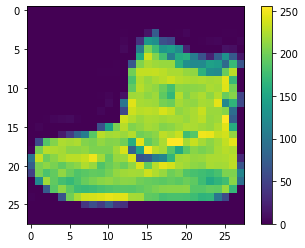

In [ ]:
# Plotando o que parece ser um tenis(Ankle boot)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

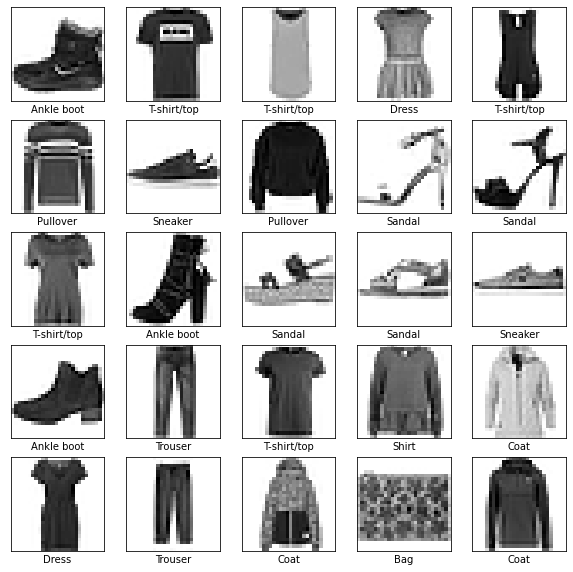

In [ ]:
# Plot com os objetos e suas definições
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Treinamento da rede com três camadas 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, tf.keras.layers.Flatten, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas tf.keras.layers.Dense. Essas são camadas neurais densely connected, ou fully connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camada é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

Compile o modelo
Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para a direção certa.
Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4982 - accuracy: 0.8263
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3765 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2932 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2782 - accuracy: 0.8986
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2674 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2459 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3336 - accuracy: 0.8843 - 696ms/epoch - 2ms/step

Test accuracy: 0.8842999935150146


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[0]

array([4.0629442e-07, 4.3800108e-10, 1.5055354e-08, 2.7603718e-11,
       3.2282472e-08, 3.1490327e-04, 6.4647008e-09, 1.9521291e-03,
       8.5295443e-10, 9.9773252e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
# Função para identificar as imagens e as predições

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

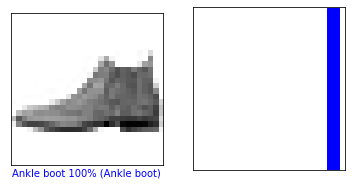

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

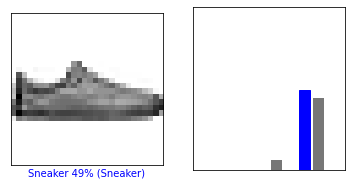

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

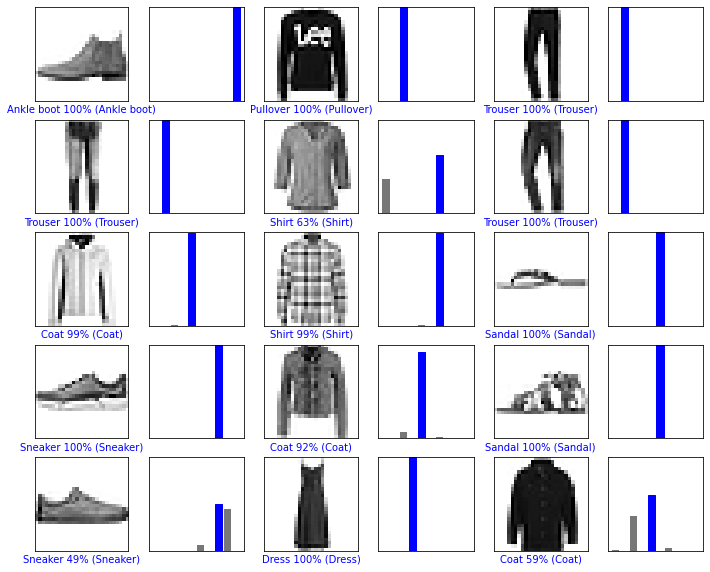

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

## Conclusões 

O modelo teve uma performance aceitável porém poderia ser melhor, próximo objetivo é realizar o transfer_learning da vgg16 e ver se o resultado é melhor

In [ ]:
from keras.applications import vgg16

# VGG16 was designed to work on 224 x 224 pixel input images sizes (base é a imagenet)
# Aqui vamos usar para as imagens 32 x 32 do CIFAR10

# Loads the VGG16 model without the top or FC layers
vgg16_model = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

In [ ]:
model2 = keras.Sequential()
for layer in vgg16_model.layers:
  model2.add(layer)

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [ ]:
# Congelando os pesos que não vou treinar
for layer in model2.layers:
  layer.trainable = False

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [ ]:
# Adicionando mais uns layerzinhos no final, atenção pra saída que tem que ser com 10 classes
model2.add(layers.Flatten(), input =(32, 28, 28))
model2.add(layers.Dense(300, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

TypeError: ignored

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [ ]:
model2.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>

In [ ]:
# callbacks: early stopping
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=20, verbose=2
)

In [ ]:
# compile model
opt = keras.optimizers.Adadelta()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# nunca esquecer do pré-processamento!
input_test = tf.keras.applications.vgg16.preprocess_input(test_images)
input_train = tf.keras.applications.vgg16.preprocess_input(train_images)

In [ ]:
# callbacks: tensorboard e early stopping
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + (datetime.datetime.now() + datetime.timedelta(hours=-3)).strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [ ]:
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [ ]:
# fit model
model2.fit(input_train,
           y_train,
           epochs=50,
           batch_size=32,
           validation_data=(input_test, y_test),
           callbacks=[tb_callback])
           #, callbacks=[stopper])

Epoch 1/50


ValueError: ignored